In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("E:\\projects\\vital_signs.csv")
data

,HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,94.0,21.0,97.0,36.2,NotLie
1,94.0,25.0,97.0,36.2,NotLie
2,101.0,25.0,93.0,38.0,Lie
3,55.0,11.0,100.0,35.0,Lie
4,93.0,26.0,95.0,37.0,NotLie
...,...,...,...,...,...
25488,56.0,12.0,101.0,33.0,Lie
25489,94.0,25.0,98.0,36.4,NotLie
25490,94.0,21.0,97.0,36.2,NotLie
25491,93.0,27.0,95.0,37.0,NotLie


In [3]:
data.describe()

,HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C)
count,25488.000000,25346.000000,25366.000000,25493.000000
mean,89.127943,17.640496,96.716471,37.590123
std,13.220448,3.589381,3.323381,5.211265
min,44.000000,0.000000,83.000000,21.000000
25%,81.000000,16.000000,95.000000,34.000000
50%,89.000000,18.000000,97.000000,38.000000
75%,95.000000,20.000000,99.000000,41.000000
max,139.000000,34.000000,111.000000,49.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25493 entries, 0 to 25492
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    HR (BPM)    25488 non-null  float64
 1    RESP (BPM)  25346 non-null  float64
 2    SpO2 (%)    25366 non-null  float64
 3   TEMP (*C)    25493 non-null  float64
 4   OUTPUT       25493 non-null  object 
dtypes: float64(4), object(1)
memory usage: 995.9+ KB


In [5]:
data.isna().sum()

 HR (BPM)        5
 RESP (BPM)    147
 SpO2 (%)      127
TEMP (*C)        0
OUTPUT           0
dtype: int64

# Data Preprocessing

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

17110

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(8104, 5)

# Data visualization

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTPUT', ylabel='count'>

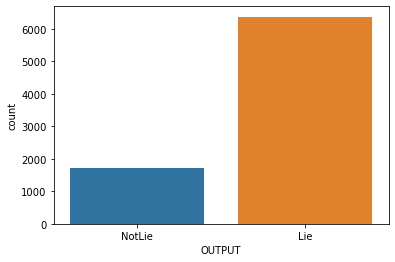

In [10]:
sns.countplot(data['OUTPUT'])

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTPUT', ylabel=' HR (BPM)'>

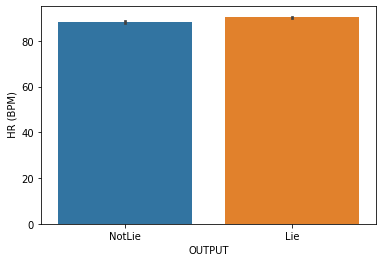

In [11]:
sns.barplot(data['OUTPUT'],data.iloc[:,0])

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTPUT', ylabel=' RESP (BPM)'>

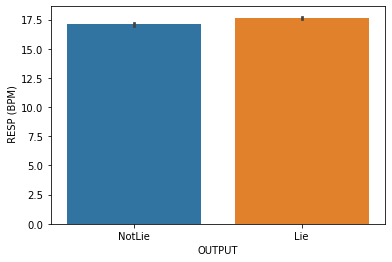

In [12]:
sns.barplot(data['OUTPUT'],data.iloc[:,1])

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTPUT', ylabel=' SpO2 (%)'>

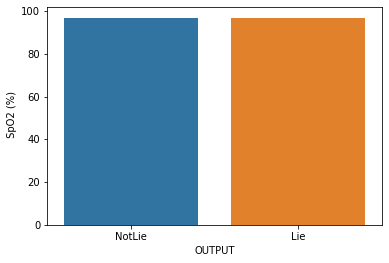

In [13]:
sns.barplot(data['OUTPUT'],data.iloc[:,2])

In [14]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
data['OUTPUT']=labelencoder.fit_transform(data['OUTPUT'])

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [16]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=42)
x,y= sm.fit_resample(x,y)

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTPUT', ylabel='count'>

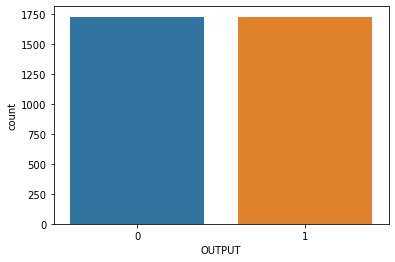

In [17]:
sns.countplot(y,data=data)

# Data scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
data_scale=MinMaxScaler(feature_range=(0,1))
x=data_scale.fit_transform(x)

# Data spliting

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44,shuffle=True)


# Optimization

In [20]:
from sklearn.neural_network import MLPClassifier
nnclassifier=MLPClassifier(max_iter=200)

In [21]:
selected_paramters={'activation':("tanh","relu","logistic"),'solver':("lbfgs","adam"),'alpha':(0.0001,0.1)}

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
Grid=RandomizedSearchCV(nnclassifier,selected_paramters,cv=2,return_train_score=True)
Grid.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=MLPClassifier(),
                   param_distributions={'activation': ('tanh', 'relu',
                                                       'logistic'),
                                        'alpha': (0.0001, 0.1),
                                        'solver': ('lbfgs', 'adam')},
                   return_train_score=True)

In [31]:
print('params : ' , Grid.best_params_)

params :  {'solver': 'lbfgs', 'alpha': 0.0001, 'activation': 'logistic'}


In [32]:
Grid.score(x_train,y_train)

0.9874892148403797

In [33]:
Grid.score(x_test,y_test)

0.9824868651488616

In [34]:
y_pred=Grid.predict(x_test)

In [35]:
from sklearn.metrics import classification_report
cp=classification_report(y_test,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       555
           1       0.98      0.99      0.98       587

    accuracy                           0.98      1142
   macro avg       0.98      0.98      0.98      1142
weighted avg       0.98      0.98      0.98      1142



<AxesSubplot:>

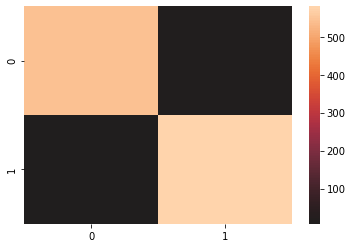

In [36]:
from sklearn.metrics import confusion_matrix
error=confusion_matrix(y_test,y_pred)
sns.heatmap(error,center=True)

In [37]:
error=confusion_matrix(y_test,y_pred)
error

array([[542,  13],
       [  7, 580]], dtype=int64)